In [1]:
import os
os.chdir(r"C:\Users\drang\Documents\learn\ml code\ml ex 1 ng")
print(os.getcwd())


C:\Users\drang\Documents\learn\ml code\ml ex 1 ng


In [2]:
"""
CRIM - per capita crime rate by town
ZN - proportion of residential land zoned for lots over 25,000 sq.ft.
INDUS - proportion of non-retail business acres per town.
CHAS - Charles River dummy variable (1 if tract bounds river; 0 otherwise)
NOX - nitric oxides concentration (parts per 10 million)
RM - average number of rooms per dwelling
AGE - proportion of owner-occupied units built prior to 1940
DIS - weighted distances to five Boston employment centres
RAD - index of accessibility to radial highways
TAX - full-value property-tax rate per $10,000
PTRATIO - pupil-teacher ratio by town
B - 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
LSTAT - % lower status of the population
MEDV - Median value of owner-occupied homes in $1000's 
"""

"\nCRIM - per capita crime rate by town\nZN - proportion of residential land zoned for lots over 25,000 sq.ft.\nINDUS - proportion of non-retail business acres per town.\nCHAS - Charles River dummy variable (1 if tract bounds river; 0 otherwise)\nNOX - nitric oxides concentration (parts per 10 million)\nRM - average number of rooms per dwelling\nAGE - proportion of owner-occupied units built prior to 1940\nDIS - weighted distances to five Boston employment centres\nRAD - index of accessibility to radial highways\nTAX - full-value property-tax rate per $10,000\nPTRATIO - pupil-teacher ratio by town\nB - 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town\nLSTAT - % lower status of the population\nMEDV - Median value of owner-occupied homes in $1000's \n"

In [3]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory
import os
print(os.listdir())
# Any results you write to the current directory are saved as output.
from pandas import read_csv
#Lets load the dataset and sample some
column_names = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']
data = read_csv('housing.csv', header=None, delimiter=r"\s+", names=column_names)
print(data.head(5))

['.ipynb_checkpoints', 'computeCost.m', 'computeCostMulti.m', 'ex1 LINEAR REGRESSION with normalized method nd normal eqn.ipynb', 'ex1-checkpoint.pynb', 'ex1.ipynb', 'ex1.m', 'ex1.pdf', 'ex1.pynb', 'ex1data1.txt', 'ex1data2.txt', 'ex1_multi.m', 'ex2.txt', 'featureNormalize.m', 'gradientDescent.m', 'gradientDescentMulti.m', 'housing.csv', 'lib', 'matplot of ex1.png', 'normalEqn.m', 'plotData.m', 'submit.m', 'utils1.py', 'utils2.py', 'warmUpExercise.m', '__pycache__']
      CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0  0.00632  18.0   2.31     0  0.538  6.575  65.2  4.0900    1  296.0   
1  0.02731   0.0   7.07     0  0.469  6.421  78.9  4.9671    2  242.0   
2  0.02729   0.0   7.07     0  0.469  7.185  61.1  4.9671    2  242.0   
3  0.03237   0.0   2.18     0  0.458  6.998  45.8  6.0622    3  222.0   
4  0.06905   0.0   2.18     0  0.458  7.147  54.2  6.0622    3  222.0   

   PTRATIO       B  LSTAT  MEDV  
0     15.3  396.90   4.98  24.0  
1     17.8  396.90   9

In [4]:
print(np.shape(data))
print(data.describe())
print(data.head())

(506, 14)
             CRIM          ZN       INDUS        CHAS         NOX          RM  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean     3.613524   11.363636   11.136779    0.069170    0.554695    6.284634   
std      8.601545   23.322453    6.860353    0.253994    0.115878    0.702617   
min      0.006320    0.000000    0.460000    0.000000    0.385000    3.561000   
25%      0.082045    0.000000    5.190000    0.000000    0.449000    5.885500   
50%      0.256510    0.000000    9.690000    0.000000    0.538000    6.208500   
75%      3.677083   12.500000   18.100000    0.000000    0.624000    6.623500   
max     88.976200  100.000000   27.740000    1.000000    0.871000    8.780000   

              AGE         DIS         RAD         TAX     PTRATIO           B  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean    68.574901    3.795043    9.549407  408.237154   18.455534  356.674032   
std     28.148861

In [5]:
pip install seaborn

Note: you may need to restart the kernel to use updated packages.


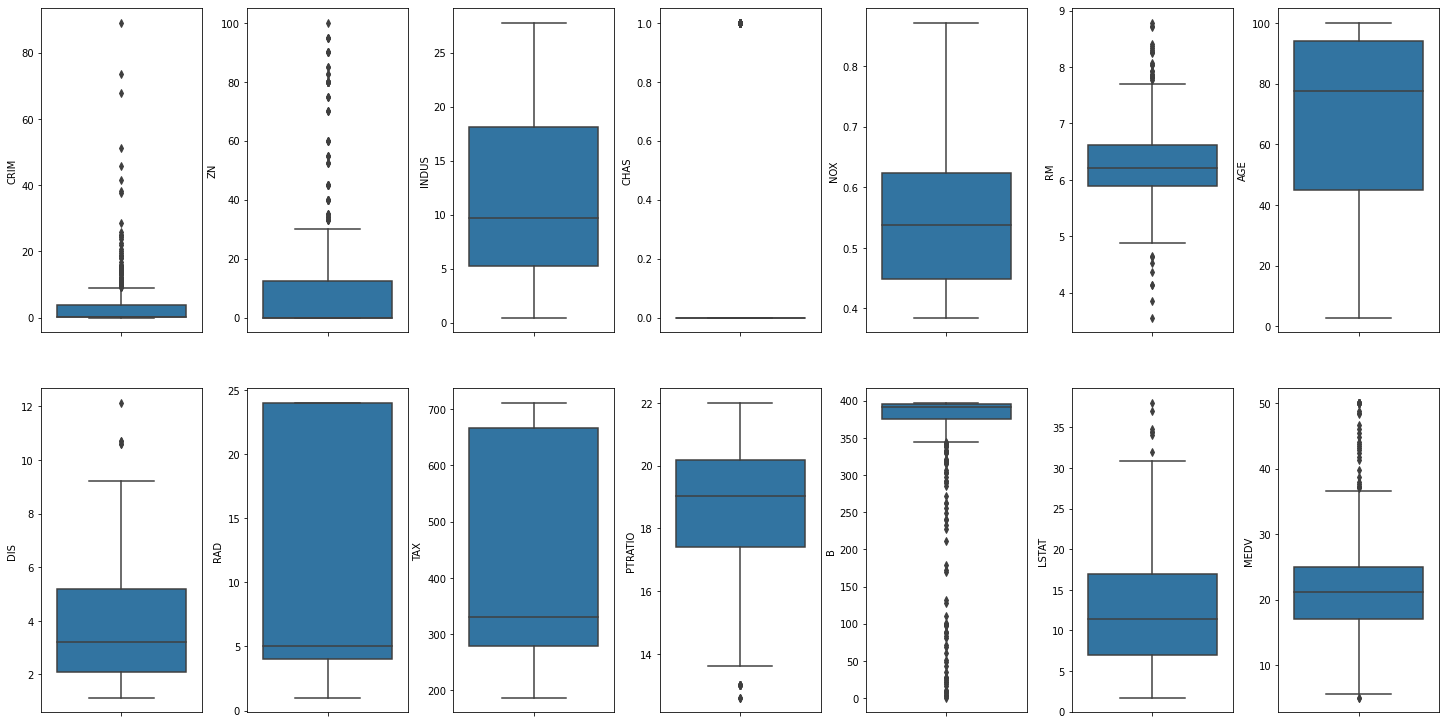

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

fig, axs = plt.subplots(ncols=7, nrows=2, figsize=(20, 10))
index = 0
axs = axs.flatten()
for k,v in data.items():
    sns.boxplot(y=k, data=data, ax=axs[index])
    index += 1
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=5.0)


In [7]:
for i, j in data.items():
        q1 = j.quantile(0.25)
        q3 = j.quantile(0.75)
        irq = q3 - q1
        v_col = j[(j <= q1 - 1.5 * irq) | (j >= q3 + 1.5 * irq)]
        perc = np.shape(v_col)[0] * 100.0 / np.shape(data)[0]
        print("Column %s outliers = %.2f%%" % (i, perc))
    
    

Column CRIM outliers = 13.04%
Column ZN outliers = 13.44%
Column INDUS outliers = 0.00%
Column CHAS outliers = 100.00%
Column NOX outliers = 0.00%
Column RM outliers = 5.93%
Column AGE outliers = 0.00%
Column DIS outliers = 0.99%
Column RAD outliers = 0.00%
Column TAX outliers = 0.00%
Column PTRATIO outliers = 2.96%
Column B outliers = 15.22%
Column LSTAT outliers = 1.38%
Column MEDV outliers = 7.91%


In [8]:
data = data[~(data['MEDV'] >= 50.0)]
print(np.shape(data))

(490, 14)


C:\Users\drang\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\drang\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\drang\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-lev

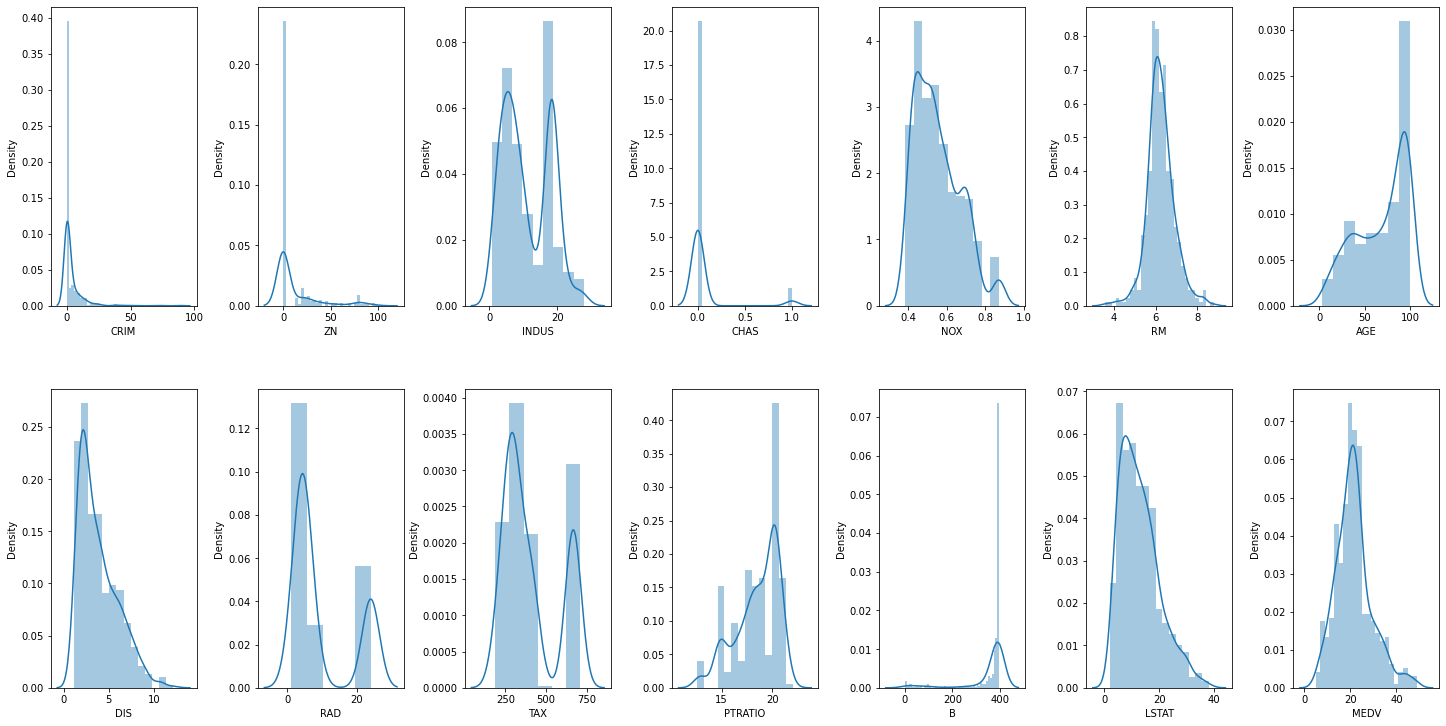

In [9]:
fig, axs = plt.subplots(nrows=2, ncols=7, figsize=(20,10))
axes = axs.flatten()
index=0
for i, j in data.items():
    sns.distplot(j, ax= axes[index])
    index+=1
    
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=5.0)


<AxesSubplot:>

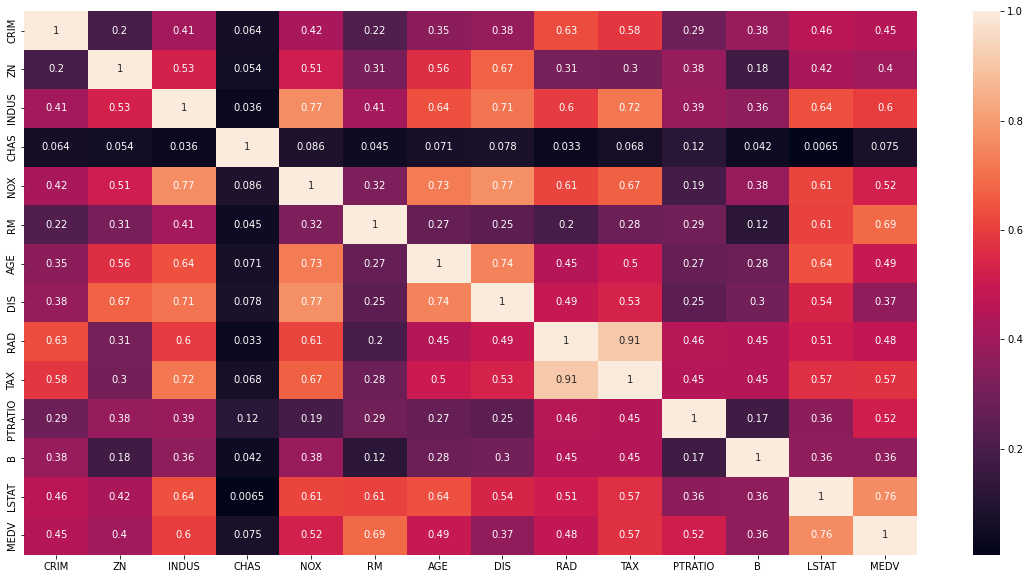

In [10]:
plt.figure(figsize=(20, 10))
sns.heatmap(data.corr().abs(),  annot=True)

In [11]:
print(data.corr())

             CRIM        ZN     INDUS      CHAS       NOX        RM       AGE  \
CRIM     1.000000 -0.199075  0.408053 -0.064210  0.420476 -0.219307  0.353751   
ZN      -0.199075  1.000000 -0.527121 -0.053911 -0.512137  0.310506 -0.563184   
INDUS    0.408053 -0.527121  1.000000  0.035815  0.765155 -0.412413  0.637970   
CHAS    -0.064210 -0.053911  0.035815  1.000000  0.085619  0.044979  0.071194   
NOX      0.420476 -0.512137  0.765155  0.085619  1.000000 -0.322609  0.727671   
RM      -0.219307  0.310506 -0.412413  0.044979 -0.322609  1.000000 -0.268464   
AGE      0.353751 -0.563184  0.637970  0.071194  0.727671 -0.268464  1.000000   
DIS     -0.382231  0.673227 -0.710284 -0.077705 -0.768122  0.245789 -0.743043   
RAD      0.627434 -0.307726  0.596124 -0.032786  0.612160 -0.195768  0.451939   
TAX      0.583711 -0.302897  0.717678 -0.067743  0.667380 -0.281955  0.499682   
PTRATIO  0.287079 -0.381815  0.387656 -0.116830  0.188381 -0.293299  0.268459   
B       -0.384460  0.176117 

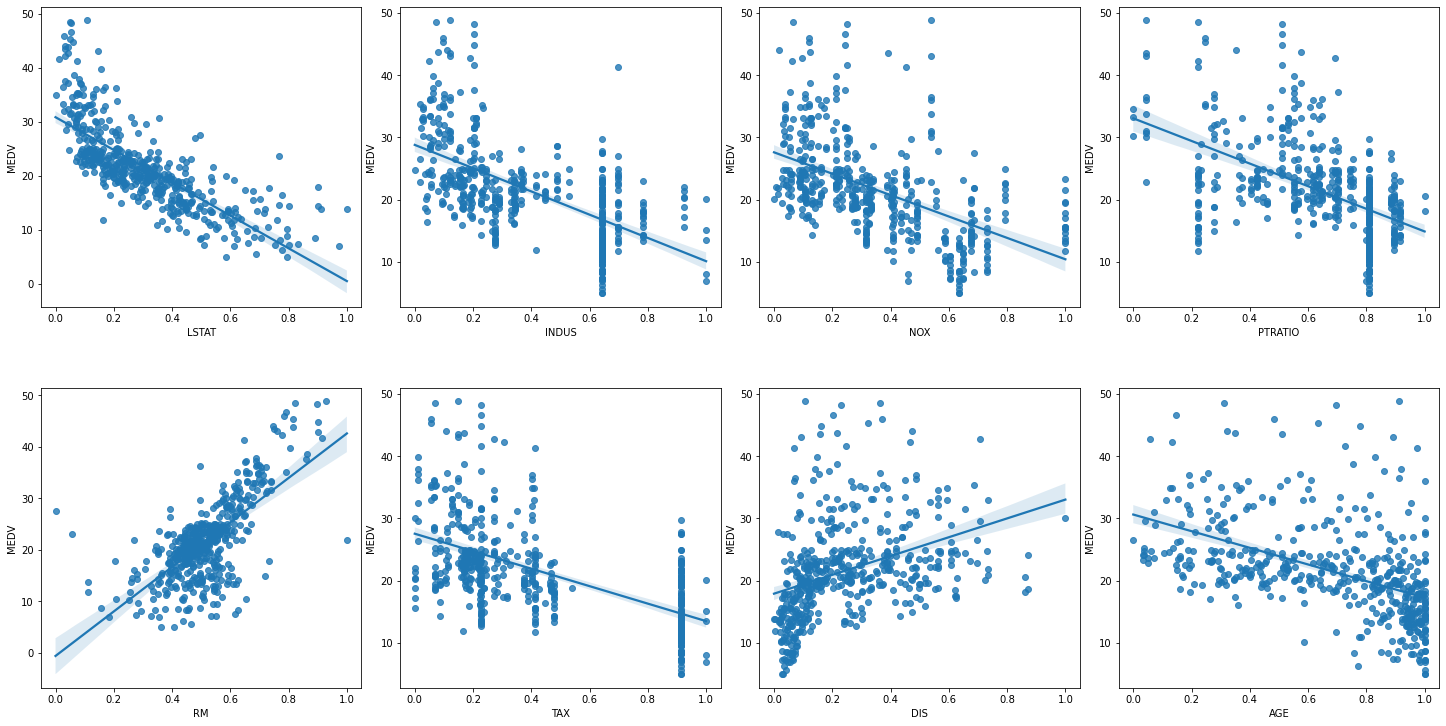

In [12]:
from sklearn import preprocessing
# Let's scale the columns before plotting them against MEDV
min_max_scaler = preprocessing.MinMaxScaler()
column_sels = ['LSTAT', 'INDUS', 'NOX', 'PTRATIO', 'RM', 'TAX', 'DIS', 'AGE']
x = data.loc[:,column_sels]
y = data['MEDV']
x = pd.DataFrame(data=min_max_scaler.fit_transform(x), columns=column_sels)
fig, axs = plt.subplots(ncols=4, nrows=2, figsize=(20, 10))
index = 0
axs = axs.flatten()
for i, k in enumerate(column_sels):
    sns.regplot(y=y, x=x[k], ax=axs[i])
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=5.0)

In [13]:
y =  np.log1p(y)
for col in x.columns:
    if np.abs(x[col].skew()) > 0.3:
        x[col] = np.log1p(x[col])
    print(x[col].skew()>0.3)

True
False
True
False
False
True
True
False


In [14]:
print(y)

0      3.218876
1      3.117950
2      3.575151
3      3.538057
4      3.616309
         ...   
501    3.152736
502    3.072693
503    3.214868
504    3.135494
505    2.557227
Name: MEDV, Length: 490, dtype: float64


In [15]:
from sklearn import datasets, linear_model
from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold

In [23]:
from sklearn import datasets, linear_model
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
import numpy as np

l_regression = linear_model.LinearRegression()
kf = KFold(n_splits=10)
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
scores = cross_val_score(l_regression, x_scaled, y, cv=kf, scoring='neg_mean_squared_error')
print("MSE: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std()))

scores_map = {}
scores_map['LinearRegression'] = scores
l_ridge = linear_model.Ridge()
scores = cross_val_score(l_ridge, x_scaled, y, cv=kf, scoring='neg_mean_squared_error')
scores_map['Ridge'] = scores
print("MSE: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std()))

# Lets try polinomial regression with L2 with degree for the best fit
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import PolynomialFeatures
#for degree in range(2, 6):
#    model = make_pipeline(PolynomialFeatures(degree=degree), linear_model.Ridge())
#    scores = cross_val_score(model, x_scaled, y, cv=kf, scoring='neg_mean_squared_error')
#    print("MSE: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std()))
model = make_pipeline(PolynomialFeatures(degree=3), linear_model.Ridge())
scores = cross_val_score(model, x_scaled, y, cv=kf, scoring='neg_mean_squared_error')
sc=cross_val_score(model, x_scaled, y, cv=kf, scoring='f1_macro')
scores_map['PolyRidge'] = scores
sc_map={}
sc_map["polyride"] = sc
print(sc)
print("MSE: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std()))

MSE: -0.04 (+/- 0.04)
MSE: -0.04 (+/- 0.04)
[nan nan nan nan nan nan nan nan nan nan]
MSE: -0.03 (+/- 0.03)


C:\Users\drang\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\drang\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\drang\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 103, in __call__
    score = scorer._score(cached_call, estimator, *args, **kwargs)
  File "C:\Users\drang\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 264, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "C:\Users\drang\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 1123, in f1_score
    return fbeta_score(
  File "C:\Users\drang\anaconda3\lib\site-packages\sklearn\metrics\_classification.py", line 1261, in fbeta_score
    _, _,

In [17]:
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV

svr_rbf = SVR(kernel='rbf', C=1e3, gamma=0.1)
grid_sv = GridSearchCV(svr_rbf, cv=kf, param_grid={"C": [1e0, 1e1, 1e2, 1e3], "gamma": np.logspace(-2, 2, 5)}, scoring='neg_mean_squared_error')
grid_sv.fit(x_scaled, y)
print("Best classifier :", grid_sv.best_estimator_)
scores = cross_val_score(svr_rbf, x_scaled, y, cv=kf, scoring='neg_mean_squared_error')
scores_map['SVR'] = scores
print("MSE: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std()))

Best classifier : SVR(gamma=1.0)
MSE: -0.04 (+/- 0.03)


In [18]:
from sklearn.tree import DecisionTreeRegressor

desc_tr = DecisionTreeRegressor(max_depth=5)
grid_sv = GridSearchCV(desc_tr, cv=kf, param_grid={"max_depth" : [1, 2, 3, 4, 5, 6, 7]}, scoring='neg_mean_squared_error')
grid_sv.fit(x_scaled, y)
print("Best classifier :", grid_sv.best_estimator_)
scores = cross_val_score(desc_tr, x_scaled, y, cv=kf, scoring='neg_mean_squared_error')
scores_map['DecisionTreeRegressor'] = scores
print("MSE: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std()))

Best classifier : DecisionTreeRegressor(max_depth=4)
MSE: -0.05 (+/- 0.04)


In [19]:
#performance accuracy * def a score func *use make scorer for gridserch/cvs compatabile
#R2SCORE
from sklearn.metrics import r2_score

def performance_metric(y_true, y_predict):
    """ Calculates and returns the performance score between 
        true (y_true) and predicted (y_predict) values based on the metric chosen. """
    
    score = r2_score(y_true, y_predict)
    #print(score)
    # Return the score
    return score
# Import 'train_test_split'
from sklearn.model_selection import train_test_split

# Shuffle and split the data into training and testing subsets
X_train, X_test, y_train, y_test = train_test_split(x, y, random_state = 42)

# Success

from sklearn.metrics import make_scorer
scoring_fnc = make_scorer(performance_metric)

from sklearn.tree import DecisionTreeRegressor

desc_tr = DecisionTreeRegressor(max_depth=5)
grid_sv = GridSearchCV(desc_tr, cv=kf, param_grid={"max_depth" : [1, 2, 3, 4, 5, 6, 7]}, scoring=scoring_fnc)
grid_sv.fit(x_scaled, y)
print("Best classifier :", grid_sv.best_estimator_)
scores = cross_val_score(desc_tr, x_scaled, y, cv=kf, scoring=scoring_fnc)
#scores_map['DecisionTreeRegressor'] = scores
print("MSE: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std()))
print("Training and testing split was successful.")
#performance_metric(y_train, y_test)
print(scores.mean())
desc_tr.fit(X_train, y_train)
print(grid_sv.best_score_, desc_tr.score(X_test,y_test))

Best classifier : DecisionTreeRegressor(max_depth=4)
MSE: 0.24 (+/- 0.49)
Training and testing split was successful.
0.24048907549056842
0.3553349720143889 0.6522222493944541


In [20]:
"""
from sklearn.neighbors import KNeighborsRegressor

knn = KNeighborsRegressor(n_neighbors=7)
scores = cross_val_score(knn, x_scaled, y, cv=kf, scoring='neg_mean_squared_error')
sc = cross_val_score(knn, x_scaled, y, cv=kf, scoring='f1_macro')
sc_map["knn"]=sc
scores_map['KNeighborsRegressor'] = scores
#grid_sv = GridSearchCV(knn, cv=kf, param_grid={"n_neighbors" : [2, 3, 4, 5, 6, 7]}, scoring='neg_mean_squared_error')
#grid_sv.fit(x_scaled, y)
#print("Best classifier :", grid_sv.best_estimator_)
print("KNN Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std()))
#print(knn.score(x_scaled, y))
print(sc)
"""

'\nfrom sklearn.neighbors import KNeighborsRegressor\n\nknn = KNeighborsRegressor(n_neighbors=7)\nscores = cross_val_score(knn, x_scaled, y, cv=kf, scoring=\'neg_mean_squared_error\')\nsc = cross_val_score(knn, x_scaled, y, cv=kf, scoring=\'f1_macro\')\nsc_map["knn"]=sc\nscores_map[\'KNeighborsRegressor\'] = scores\n#grid_sv = GridSearchCV(knn, cv=kf, param_grid={"n_neighbors" : [2, 3, 4, 5, 6, 7]}, scoring=\'neg_mean_squared_error\')\n#grid_sv.fit(x_scaled, y)\n#print("Best classifier :", grid_sv.best_estimator_)\nprint("KNN Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std()))\n#print(knn.score(x_scaled, y))\nprint(sc)\n'

In [21]:
from sklearn.ensemble import GradientBoostingRegressor

gbr = GradientBoostingRegressor(alpha=0.9,learning_rate=0.05, max_depth=2, min_samples_leaf=5, min_samples_split=2, n_estimators=100, random_state=30)
param_grid={'n_estimators':[100, 200], 'learning_rate': [0.1,0.05,0.02], 'max_depth':[2, 4,6], 'min_samples_leaf':[3,5,9]}
grid_sv = GridSearchCV(gbr, cv=kf, param_grid=param_grid, scoring='neg_mean_squared_error')
grid_sv.fit(x_scaled, y)
print("Best classifier :", grid_sv.best_estimator_, "sssssssssss", grid_sv.best_params_)
scores = cross_val_score(gbr, x_scaled, y, cv=kf, scoring='neg_mean_squared_error')
scores_map['GradientBoostingRegressor'] = scores
print("MSE: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std()))

Best classifier : GradientBoostingRegressor(learning_rate=0.05, max_depth=2, min_samples_leaf=9,
                          random_state=30) sssssssssss {'learning_rate': 0.05, 'max_depth': 2, 'min_samples_leaf': 9, 'n_estimators': 100}
MSE: -0.03 (+/- 0.02)


In [22]:
print(scores_map)
plt.figure(figsize=(20, 10))
scores_map = pd.DataFrame(scores_map)
sns.boxplot(scores_map)
print(scores_map)
print(scores_map.head())

{'LinearRegression': array([-0.01522423, -0.01564125, -0.01259422, -0.02250154, -0.03026086,
       -0.01863865, -0.01676497, -0.14558976, -0.06624903, -0.05996601]), 'Ridge': array([-0.01525835, -0.0134834 , -0.01247555, -0.02071603, -0.0290464 ,
       -0.01968222, -0.01745102, -0.13442978, -0.06724139, -0.06032777]), 'PolyRidge': array([-0.02277664, -0.00951807, -0.03907147, -0.02620296, -0.01457345,
       -0.00754751, -0.0162006 , -0.09999574, -0.0591631 , -0.04713878]), 'SVR': array([-0.04054003, -0.01091794, -0.02403293, -0.05176545, -0.012905  ,
       -0.01409736, -0.01931192, -0.12381636, -0.05927422, -0.05314475]), 'DecisionTreeRegressor': array([-0.03191119, -0.00741088, -0.0442541 , -0.0437761 , -0.02813986,
       -0.01884962, -0.02911499, -0.08939956, -0.14383128, -0.06097506]), 'GradientBoostingRegressor': array([-0.02071969, -0.0069742 , -0.01224872, -0.02456557, -0.02110716,
       -0.01479057, -0.01482734, -0.07644553, -0.06627678, -0.03073526])}


C:\Users\drang\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


ValueError: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

<Figure size 1440x720 with 0 Axes>